In [16]:

from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

In [27]:
base1 = """

l L0 10 0 n0                           #input laser

tem L0 0 0 1 0                         #tem modes
tem L0 1 0 1 0 
tem L0 2 0 1 0 
tem L0 3 0 1 0 
tem L0 4 0 1 0 
tem L0 5 0 1 0 
tem L0 6 0 1 0 
tem L0 7 0 1 0 


s s1 1 n0 n5            

m itmx0 0 1 0 n5 n6                     #ITM surface 1
s itmx_l 0.035 1.44963 n6 n7            #thickness of mirror
m2 itmx 0.99 50u 0 n7 n8                #ITM surface 2

s s2 9.1 n8 n9                          #cavity length

m2 etmx 0.998 50u 0 n9 n10              #ETM surface 2
s etmx_l 0.035 1.44963 n10 n11          #thickness of mirror
m etmx0 0 1 0 n11 n12                   #ETM surface 1

attr etmx Rcx 34                        #roc of mirror
attr etmx Rcy 34

xaxis etmx Rcx lin 20 40 6000
func g = 1-(9.1/$x1)


put etmx Rcy $x1


ad order0 0 0 0 n12                     #ad detectors
ad order1 1 0 0 n12
ad order2 2 0 0 n12
ad order3 3 0 0 n12
ad order4 4 0 0 n12
ad order5 5 0 0 n12
ad order6 6 0 0 n12
ad order7 7 0 0 n12



cav FP itmx n8 etmx n9
cp FP x finesse
maxtem 7
phase 2

#noplot Rc2
"""

In [52]:
basekat = finesse.kat() 
basekat.verbose = 1
basekat.parse(base1)

out = basekat.run()
out.info()
#out.plot(['FP_x_w'])

Parsing `tem L0 0 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 1 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 2 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 3 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 4 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 5 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 6 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 7 0 1 0` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2021-07-05 03:01:54.118840


100% | ETA:  0:00:00 | Calculating                                             

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 104.985 seconds

--- Output info ---

Run date and time: 2021-07-05 03:01:54.119846
Detectors used: FP_x_finesse, g, order0, order1, order2, order3, order4, order5, order6, order7

One xaxis used: ['xaxis etmx Rcx lin 20 40 6000', 'put etmx Rcy $x1']
order0       : min = 8.196915074827770e-01 max = 8.196915074827770e-01
order1       : min = 3.661443963356870e-03 max = 5.178012053179090e-03
order2       : min = 2.479856155834440e-03 max = 2.945707892353560e-03
order3       : min = 2.469792409247010e-03 max = 3.102927336923110e-03
order4       : min = 2.702487067703180e-03 max = 1.377509613077100e-02
order5       : min = 4.051366968219800e-03 max = 8.195825321064060e-01
order6       : min = 2.562893120179150e-03 max = 8.196915074827770e-01
order7       : min = 2.469792427140160e-03 max = 7.430216823919880e-03
FP_x_finesse : min = 5.213234162156340e+02 max = 5.213234162156340e+02
g            : min = 5.45000

100% | ETA:  0:00:00 | Calculating                                             

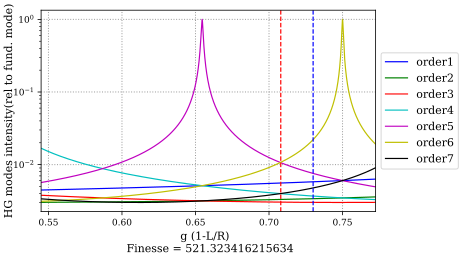

In [53]:
y=[]
x= out['g']
colors = ['b','g','r','c','m','y','k','teal','violet','pink','olive']
#plt.figure(figsize=(8,4))


#append all output detectors in an array
for i in range(0,7,1):
    y.append(out['order'+str(i+1)]/out['order0'])


#plot all outputs
for k in range(0,7,1):
    plt.semilogy(x,y[k],antialiased=False,label='order'+str(k),c=colors[k])  
    
  
#label and other stuff
plt.grid(linewidth=1)
plt.legend(["order1","order2","order3","order4","order5","order6","order7","order8","order9","order10"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("g (1-L/R)  \n Finesse = "+str(out['FP_x_finesse'][1]))
plt.ylabel("HG modes intensity(rel to fund. mode)",verticalalignment='center')
plt.axvline(x = 0.708, color = 'r', linestyle = 'dashed')
plt.axvline(x = 0.73, color = 'b', linestyle = 'dashed')

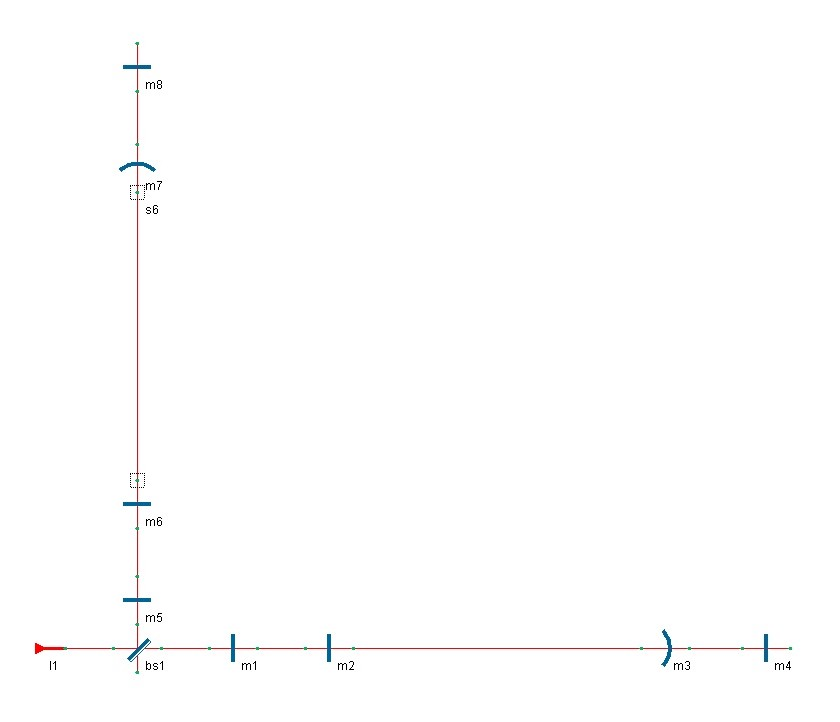

In [31]:
display.Image("C:/Users/Parivesh/Desktop/9.1m.jpg",width = 500, height = 300)

In [47]:
base2 = """ 
l L0 10 0 n0                      #input laser
s s1 1 n0 n1                      #laser cav


bs bs1 0.5 0.5 0 0 n1 n2 n3 n4    #beam splitter

s sx 1 n2 n5                      #BS to ITMx cav

m itmx0 0 1 0 n5 n6               #ITM surface 1
s itmx_l 0.035 1.44963 n6 n7      #thickness of mirror
m2 itmx 0.99 50u 0 n7 n8          #ITM surface 2

s s2 9.1 n8 n9                    #arm length

m2 etmx 0.998 50u 0 n9 n10        #ETM surface 2 
s etmx_l 0.035 1.44963 n10 n11    #thickness of mirror
m etmx0 0 1 0 n11 dump            #ETM surface 1


s sy 1 n3 n13                     #BS to ITMy cav

m itmy0 0 1 0 n13 n14             
s itmy_l 0.035 1.44963 n14 n15 
m2 itmy 0.99 50u 0 n15 n16 

s s3 9.1 n16 n17

m2 etmy 0.998 50u 0 n17 n18
s etmy_l 0.035 1.44963 n18 n19
m etmy0 0 1 0 n19 n20

 
attr etmy Rc 34                   #roc of mirror
attr etmx Rc 34


xaxis etmy phi lin -220 220 7000

#maxtem 7
#phase 2


pd pd_out n4
#ad order0 0 0 0 n20                     #ad detectors
#ad order1 1 0 0 n20
#ad order2 2 0 0 n20

"""

In [48]:
basekat1 = finesse.kat() 
basekat1.verbose = 1
basekat1.parse(base2)

out = basekat1.run()


--------------------------------------------------------------
Running kat - Started at 2021-07-05 02:59:41.829657
Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe


100% | ETA:  0:00:00 | Calculating                                             


Finished in 0.261889 seconds



--- Output info ---

Run date and time: 2021-07-05 02:59:41.830646
Detectors used: pd_out

One xaxis used: ['xaxis etmy phi lin -220 220 7000']
pd_out : min = 2.898590799580060e-01 max = 4.348973420168640e+00


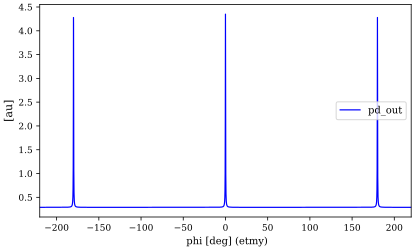

Contrast Ratio :  0.8750292967249441


In [50]:
out.info()
out.plot(['pd_out'])
#out.plot(['order0','order1','order2'])
print("Contrast Ratio : ",(np.max(out['pd_out'])-np.min(out['pd_out']))/(np.max(out['pd_out'])+np.min(out['pd_out'])))